In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
df = pd.read_csv('german_credit.csv')

In [3]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df.shape

(1000, 21)

In [5]:
df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [7]:
df.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [8]:
X = df.drop(labels= ["default"] , axis = 1)

In [9]:
y = y = df[["default"]]

In [10]:
from sklearn.model_selection import train_test_split
test_size = 0.50 
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [11]:
X_train.shape

(500, 20)

In [12]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [13]:
X_train = pd.get_dummies(X_train, drop_first=False)

In [14]:
X_train.shape

(500, 61)

In [15]:
X_train.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
262,18,5302,2,4,36,3,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
457,12,3386,3,4,35,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
82,18,1568,3,4,24,1,1,0,0,0,...,0,1,0,0,0,1,1,0,0,1
563,36,12389,1,4,37,1,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
407,15,1053,4,2,27,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0


In [16]:
# Print Shape of model data

In [17]:
X_train.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [18]:
X_train.corr(method ='pearson')

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.669686,0.061521,0.016471,-0.016886,-0.034892,-0.052569,0.114018,-0.020352,-0.069055,...,-7.916794e-02,-0.066980,0.107500,0.052840,-0.006085,-1.557128e-01,-0.148593,0.148593,-0.122827,0.122827
credit_amount,0.669686,1.000000,-0.254486,-0.024982,0.047257,-0.008663,-0.008651,0.143620,-0.056465,-0.098673,...,-1.172121e-01,-0.045493,0.334242,-0.107587,-0.051660,-1.429619e-01,-0.286036,0.286036,-0.004987,0.004987
installment_as_income_perc,0.061521,-0.254486,1.000000,0.046631,0.005176,0.013426,-0.066527,-0.067434,0.066033,-0.012067,...,2.418437e-02,-0.045652,0.024764,0.047316,-0.043179,-6.166971e-02,0.027533,-0.027533,-0.099614,0.099614
present_res_since,0.016471,-0.024982,0.046631,1.000000,0.298441,0.083938,0.062531,-0.120421,0.099763,-0.016563,...,-2.549124e-01,0.093396,0.056670,-0.068720,-0.033805,4.665443e-02,-0.147116,0.147116,-0.025856,0.025856
age,-0.016886,0.047257,0.005176,0.298441,1.000000,0.144156,0.116705,-0.088513,-0.003051,0.053409,...,2.890115e-03,-0.232857,0.193506,-0.220548,0.092830,5.942677e-02,-0.151331,0.151331,0.009335,-0.009335
credits_this_bank,-0.034892,-0.008663,0.013426,0.083938,0.144156,1.000000,0.090760,-0.134189,-0.008866,-0.101759,...,4.154080e-02,-0.097184,0.018928,0.008244,0.063727,-5.191741e-02,-0.041090,0.041090,-0.024385,0.024385
people_under_maintenance,-0.052569,-0.008651,-0.066527,0.062531,0.116705,0.090760,1.000000,-0.106872,0.076662,-0.028040,...,-2.904670e-02,-0.077498,0.011526,-0.105317,-0.040484,1.331087e-01,-0.005313,0.005313,0.099226,-0.099226
account_check_status_0 <= ... < 200 DM,0.114018,0.143620,-0.067434,-0.120421,-0.088513,-0.134189,-0.106872,1.000000,-0.373070,-0.150809,...,-1.600051e-02,0.017125,0.059625,-0.044042,0.019352,-6.874084e-03,-0.009630,0.009630,-0.054576,0.054576
account_check_status_< 0 DM,-0.020352,-0.056465,0.066033,0.099763,-0.003051,-0.008866,0.076662,-0.373070,1.000000,-0.163512,...,-1.233656e-01,0.096931,-0.046998,-0.006587,0.034859,3.533326e-02,0.112097,-0.112097,0.060026,-0.060026
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.069055,-0.098673,-0.012067,-0.016563,0.053409,-0.101759,-0.028040,-0.150809,-0.163512,1.000000,...,-3.076607e-02,0.006335,-0.034582,-0.026282,0.062226,3.732031e-02,0.060560,-0.060560,0.000377,-0.000377


### Drop the original variables which are converted to dummy

The original variables already dropped during dummy conversion.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

## We have splitted 70:30 from original data set since there is no specific information about the splitting of 70:30 from already splitted 50% of data set.

In [19]:
df1 = pd.get_dummies(df, drop_first=False)

In [20]:
X1 = df1.drop(labels= ["default"] , axis = 1)

In [21]:
X1.shape

(1000, 61)

In [22]:
y1 = df1[["default"]]

In [23]:
y1.shape

(1000, 1)

In [24]:
from sklearn.model_selection import train_test_split
test_size = 0.30 
seed = 7
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=test_size, random_state=seed)

In [25]:
X1_train.shape

(700, 61)

In [26]:
y1_train.shape

(700, 1)

In [27]:
X1_test.shape

(300, 61)

In [28]:
y1_test.shape

(300, 1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [30]:
model = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state=9999,n_jobs=2,max_features = 'sqrt')
model.fit(X1_train, y1_train)  
print(model.feature_importances_)

[0.0754983  0.10134298 0.03443534 0.03578062 0.0792481  0.01833709
 0.01399768 0.01663564 0.03125858 0.00910825 0.04972584 0.00872634
 0.01778169 0.00888567 0.01312217 0.00784475 0.0082388  0.01143112
 0.01674923 0.01024701 0.01576718 0.00456589 0.00190922 0.01336775
 0.00264083 0.00075861 0.00573674 0.01823238 0.0092939  0.00645963
 0.01247177 0.01231883 0.01499704 0.01446404 0.01372365 0.00786867
 0.01595793 0.00713166 0.008585   0.01662259 0.0063897  0.00693203
 0.01006099 0.01326841 0.01468639 0.01600141 0.01425582 0.01417819
 0.01592369 0.00642032 0.0076328  0.01390379 0.01119215 0.01075532
 0.01603623 0.00328066 0.0120295  0.01467717 0.0148875  0.00291922
 0.00330025]


In [31]:
y1_predict = model.predict(X1_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [32]:
from sklearn import metrics

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
conf_mat = confusion_matrix(y1_test, y1_predict)
print(conf_mat)

[[204  13]
 [ 47  36]]


In [35]:
print("Accuracy:",metrics.accuracy_score(y1_test, y1_predict))

Accuracy: 0.8


### Q6 Show the list of the features importance( 1 Marks)

In [36]:
fi = pd.DataFrame({'feature': list(X1_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [37]:
fi.head()

,feature,importance
1,credit_amount,0.101343
4,age,0.079248
0,duration_in_month,0.075498
10,account_check_status_no checking account,0.049726
3,present_res_since,0.035781


In [38]:
fi_1 = fi.head(15)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

No handles with labels found to put in legend.


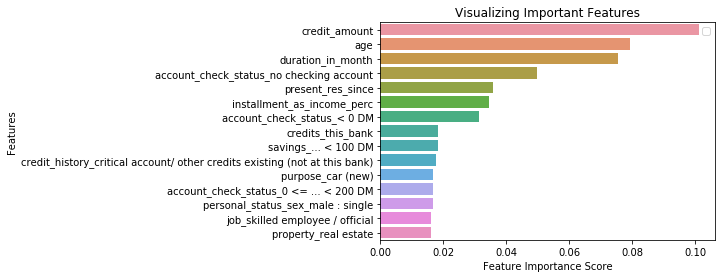

In [40]:
sns.barplot(x=fi_1["importance"], y=fi_1["feature"], ci=68)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Generating the Model with slesctive best 51 Features out of 61 Features

In [41]:
fi_2 = fi.tail(10)

In [42]:
np.array(fi_2["feature"])

array(['other_installment_plans_stores', 'other_debtors_co-applicant',
       'savings_.. >= 1000 DM ', 'purpose_education',
       'foreign_worker_yes', 'job_unemployed/ unskilled - non-resident',
       'foreign_worker_no', 'purpose_repairs',
       'purpose_furniture/equipment', 'purpose_retraining'], dtype=object)

In [43]:
X2 = X1.drop(labels = ['other_installment_plans_stores', 'other_debtors_co-applicant',
       'savings_.. >= 1000 DM ', 'purpose_education',
       'foreign_worker_yes', 'job_unemployed/ unskilled - non-resident',
       'foreign_worker_no', 'purpose_repairs',
       'purpose_furniture/equipment', 'purpose_retraining'], axis = 1)

In [44]:
y2 = y1

In [45]:
test_size = 0.30 
seed = 7
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=test_size, random_state=seed)

In [46]:
X2_train.shape

(700, 51)

In [47]:
X2_test.shape

(300, 51)

In [48]:
y2_train.shape

(700, 1)

In [49]:
y2_test.shape

(300, 1)

In [50]:
model_2 = RandomForestClassifier(n_estimators=500, criterion='entropy',random_state=9999,n_jobs=2,max_features = 'sqrt')
rf = model_2.fit(X2_train, y2_train)  
print(model_2.feature_importances_)

[0.08141213 0.10794266 0.03612907 0.03709042 0.08511869 0.0178366
 0.01313994 0.01620399 0.03258374 0.00916316 0.0529037  0.00932285
 0.0180569  0.00982829 0.01415161 0.00846715 0.00858468 0.01140818
 0.01641209 0.01054969 0.01551936 0.01312392 0.01962789 0.0089745
 0.00644964 0.01394589 0.0126438  0.01526879 0.01453125 0.01343682
 0.00914142 0.01615319 0.00721275 0.00851855 0.01657639 0.00730138
 0.01159031 0.01418434 0.01543666 0.01719993 0.01457784 0.01455096
 0.01785356 0.00721754 0.01500819 0.01032106 0.01014643 0.01622965
 0.01214818 0.0148903  0.01391392]


In [51]:
y2_predict = model_2.predict(X2_test)

In [52]:
print("Accuracy:",metrics.accuracy_score(y2_test, y2_predict))

Accuracy: 0.8


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
conf_mat = confusion_matrix(y2_test, y2_predict)
print(conf_mat)

[[203  14]
 [ 46  37]]


Conclusion: After feature selection, accuracy remains same. But true negatives slightly increased and true positives slighly reduced. Over all there is no significant improvement. Still need to work to get good accuracy.

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [55]:
# Use below values
num_folds = 10
seed = 77

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [57]:
# Use below values
num_folds = 10
seed = 77

In [58]:
#Validate the Random Forest model build above using k fold

In [59]:
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=num_folds, random_state=seed)

In [60]:
cvscore = cross_val_score(rf, X1_train, y1_train, cv=kf)

In [61]:
cvscore

array([0.77142857, 0.71428571, 0.75714286, 0.71428571, 0.68571429,
       0.74285714, 0.68571429, 0.7       , 0.74285714, 0.78571429])

In [62]:
#Calculate Mean score

In [63]:
cvscore.mean()

0.73

In [64]:
# Calculate score standard deviation using std()

In [65]:
cvscore.std()

0.03347249861102852

# Q8 Print the confusion matrix( 1 Marks)

In [66]:
from sklearn.model_selection import cross_val_predict
cvspredict = cross_val_predict(rf, X1_test, y1_test, cv=kf)

In [67]:
confusion_matrix(cvspredict, y1_test)

array([[205,  62],
       [ 12,  21]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [68]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [69]:
precision = precision_score(y1_test, cvspredict)
print('Precision: %f' % precision)

Precision: 0.636364


In [70]:
recall = recall_score(y1_test, cvspredict)
print('Recall: %f' % recall)

Recall: 0.253012


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [71]:
#Hint: Use roc_curve

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

In [72]:
from sklearn.metrics import roc_curve, auc

In [73]:
y_predictProb = model.predict_proba(X1_test)

In [74]:
fpr, tpr, thresholds = roc_curve(y1_test, y_predictProb[::,1])

In [76]:
roc_auc = auc(fpr, tpr)

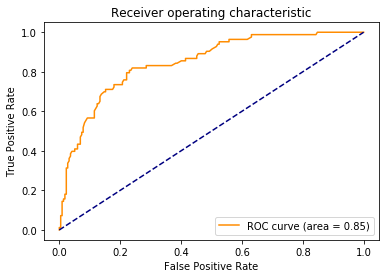

In [77]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [78]:
area_under_curve = auc(fpr, tpr)
area_under_curve

0.8477319415912499

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [79]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10

In [80]:
accuracy = []
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X1_, y1_ = resample(X1_train, y1_train)
    model.fit(X1_, y1_)
    y2_pred = model.predict(X1_test)
    acc = accuracy_score(y2_pred, y1_test)
    accuracy.append(acc)

In [81]:
accuracy

[0.7933333333333333,
 0.7966666666666666,
 0.77,
 0.7866666666666666,
 0.78,
 0.76,
 0.7933333333333333,
 0.7733333333333333,
 0.7966666666666666,
 0.8]

In [82]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7849999999999999
Standard deviation:  0.012845232578665124
